# Tasks

Now, put neural networks into action. You are tasked with building a neural network using data from this [kaggle competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=sample_submission.csv). To complete the assignment, train and evaluate your model using only the train.csv.

 ### Required Task:
Be sure to perform a train test split on the train.csv so you can evaluate your models.
Create and evaluate 3 iterations of a deep learning model to predict housing prices using the techniques you have learned to optimize your model's performance. Be sure to include some form of regularization with at least one model.
Select your best model!

### Optional Task
Use your best model to make predictions using the features in test.csv.
Submit to the Kaggle competition to see how your did!
Include a screenshot of your results from the Kaggle competition inserted in a markdown cell at the bottom of your notebook.

# Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# new libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
tf.config.set_visible_devices([], 'GPU')

import warnings 
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
filename = 'https://raw.githubusercontent.com/jaytrey777/Neural-Network-Exercise/main/train.csv'
df = pd.read_csv(filename)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# print values in each column to see if they are relevant to the target
# for col in df:
#     print(df[col].value_counts())
#     print('')

In [5]:
drop_these = ['Id', 'Street', 'Alley', 'Utilities', 'LandSlope', 
              'RoofMatl', 'MasVnrArea', 'BsmtFinSF2', 'KitchenAbvGr', 
              'Functional', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
              'PoolQC', 'Fence', 'MiscFeature']

df.drop(columns = drop_these, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

# PreProcessing

In [6]:
target = 'SalePrice'

X = df.drop(columns = target).copy()
y = df[target].copy()
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal


In [7]:
def eval_regression(model, X, y, name='model'):
    score_df = pd.DataFrame(index=[name])
    preds = model.predict(X)
    score_df.loc[name,'MAE'] = mean_absolute_error(y, preds)
    score_df.loc[name,'RMSE'] = np.sqrt(mean_squared_error(y, preds))
    score_df.loc[name,'R2'] = r2_score(y, preds)
    return score_df

def plot_history(history):
    metrics = history.history.keys()
    for metric in metrics:
        if not 'val' in metric:
            plt.plot(history.history[f'{metric}'], label=f'{metric}')
            if f'val_{metric}' in metrics:
                plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.legend()
            plt.title(f'{metric}')
            plt.show()

In [8]:
def eval_regression(y_true, y_pred, name='model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [9]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

## Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head() # quick check to see features and a bit of info in the training data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1023,120,RL,43.0,3182,Reg,Lvl,Inside,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Gd,No,GLQ,16,Unf,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0,0,2,0,2,Gd,7,1,Gd,Attchd,2005.0,Fin,2,437,TA,TA,Y,156,20,0,0,5,2008,WD,Normal
810,20,RL,78.0,10140,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,Gd,5,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,1,2006,WD,Normal
1384,50,RL,60.0,9060,Reg,Lvl,Inside,Edwards,Norm,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,WdShing,Wd Shng,None,TA,TA,BrkTil,TA,TA,Mn,Rec,204,Unf,356,560,GasA,TA,Y,SBrkr,698,560,0,1258,0,0,1,0,2,TA,6,0,NaN,Detchd,1939.0,Unf,1,280,TA,TA,P,0,0,0,0,10,2009,WD,Normal
626,20,RL,NaN,12342,IR1,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,5,5,1960,1978,Hip,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,978,978,GasA,TA,Y,SBrkr,1422,0,0,1422,0,0,1,0,3,TA,6,1,TA,Attchd,1960.0,RFn,1,286,TA,TA,Y,0,0,36,600,8,2007,WD,Normal
813,20,RL,75.0,9750,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Gable,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,608,Unf,834,1442,GasA,Gd,Y,SBrkr,1442,0,0,1442,0,0,1,1,4,TA,7,0,NaN,Attchd,1958.0,RFn,1,301,TA,TA,Y,0,0,275,500,4,2007,COD,Normal


In [11]:
y_train.head() # repeat for target 

1023    191000
810     181000
1384    105000
626     139900
813     157900
Name: SalePrice, dtype: int64

## Numerical Columns

In [12]:
median_imputer = SimpleImputer(strategy = 'median') #imptes the median value for missing vaules
scaler = StandardScaler() #scales data

numerical_pipeline = make_pipeline(median_imputer, scaler)

numerical_selector = make_column_selector(dtype_include = "number")

numerical_tuple = (numerical_pipeline, numerical_selector)

## Categorical Columns

In [13]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False) 
constant_imputer = SimpleImputer(strategy='constant', fill_value='missing') 

categorical_pipeline = make_pipeline(constant_imputer, ohe)

categorical_selector = make_column_selector(dtype_include = "object")

categorical_tuple = (categorical_pipeline, categorical_selector)

In [14]:
preprocessor = make_column_transformer(numerical_tuple, categorical_tuple, 
                                       remainder = 'drop',
                                       verbose_feature_names_out = False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x29e0ef790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x29e0ef130>)],
                  verbose_feature_names_out=False)

## Fit the Data to Preprocessor

In [15]:
X_train = preprocessor.fit_transform(X_train) # apply the preprocessor
X_test = preprocessor.transform(X_test)

# 1st Model

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

reg_model = Sequential()

input_dim = X_train.shape[1]

# 1st hidden layer
reg_model.add(Dense(10, activation='relu', input_dim = input_dim, name = 'h1'))
reg_model.add(Dense(10, activation='relu', name='h2'))

# Add output layer with 1 node
reg_model.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                2570      
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmse = RootMeanSquaredError(name="rmse")
reg_model.compile(optimizer= "adam", loss = "mse", 
                  metrics = [metrics.MeanAbsoluteError(),
                  metrics.RootMeanSquaredError()])

In [18]:
history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100,
                        verbose = 0)


2023-05-10 19:58:00.876053: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-10 19:58:01.293939: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x29fe57640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-10 19:58:01.293955: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-05-10 19:58:01.297818: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-10 19:58:01.314490: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


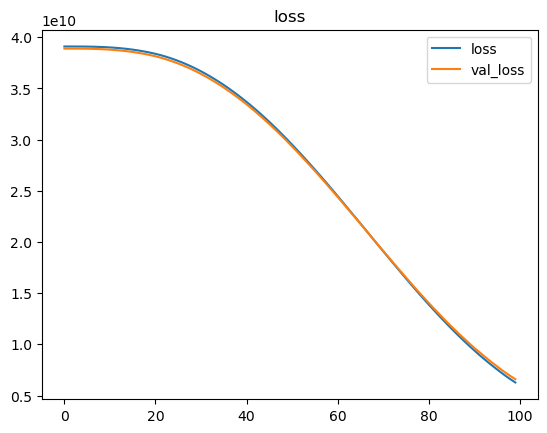

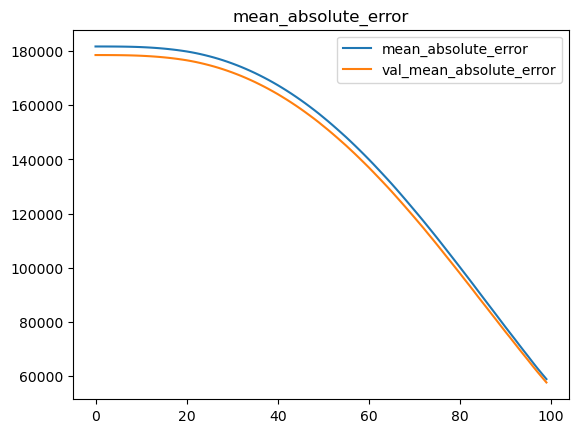

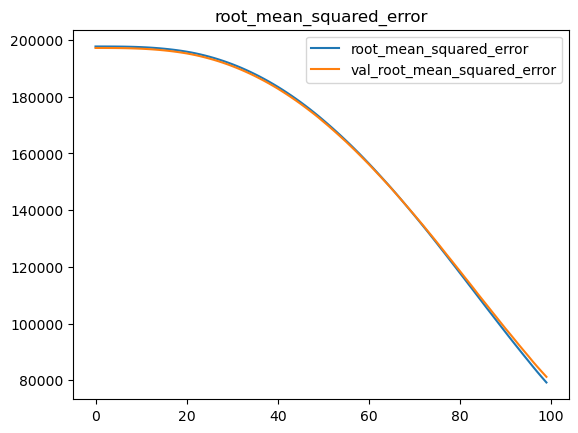

In [19]:
plot_history(history)

In [20]:
y_pred = reg_model.predict(X_test)

12/12 [==============================] - 0s 497us/step


In [21]:
eval_regression(y_test, y_pred, name="reg_model")

reg_model Scores
MAE: 57,662.0923 
MSE: 6,592,636,903.2855 
RMSE: 81,195.0547 
R2: 0.0589



# 2nd Model

In [22]:
reg_model2 = Sequential()

input_dim = X_train.shape[1]

# 1st hidden layer
reg_model2.add(Dense(15, activation='relu', input_dim = input_dim, name = 'h1'))
reg_model2.add(Dense(15, activation='relu', name='h2'))

# Output layer with 1 node
reg_model2.add(Dense(1, activation='linear', name ='output'))

# Summary 
reg_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 15)                3855      
                                                                 
 h2 (Dense)                  (None, 15)                240       
                                                                 
 output (Dense)              (None, 1)                 16        
                                                                 
Total params: 4,111
Trainable params: 4,111
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Compile the model
rmse = RootMeanSquaredError(name="rmse")
reg_model2.compile(optimizer= "adam", loss = "mse", 
                  metrics = [metrics.MeanAbsoluteError(),
                  metrics.RootMeanSquaredError()])

In [24]:
history2 = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 150,
                        verbose = 0)

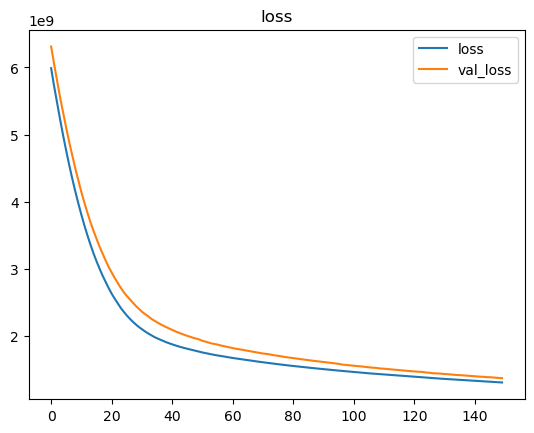

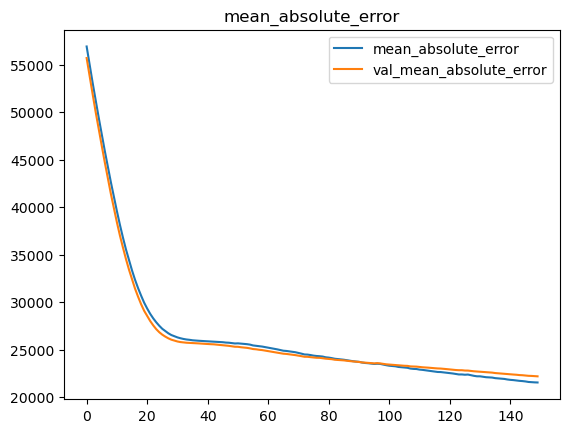

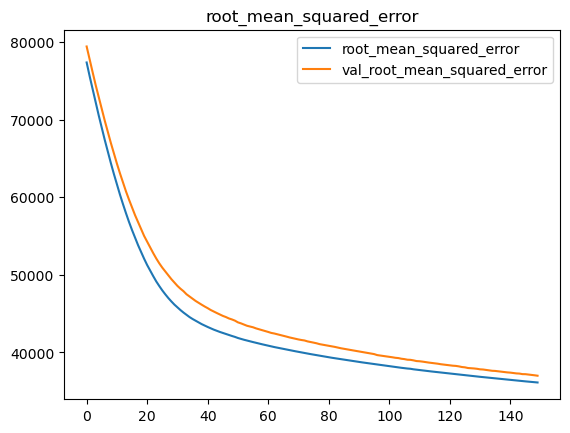

In [25]:
plot_history(history2)

In [26]:
eval_regression(y_test, y_pred, name="reg_model2")

reg_model2 Scores
MAE: 57,662.0923 
MSE: 6,592,636,903.2855 
RMSE: 81,195.0547 
R2: 0.0589



# 3rd Model

In [27]:
reg_model3 = Sequential()

input_dim = X_train.shape[1]

# 1st hidden layer
reg_model3.add(Dense(15, activation='relu', input_dim = input_dim, name = 'h1'))
reg_model3.add(Dense(15, activation='relu', name='h2'))
reg_model3.add(Dense(5, activation='relu', name='h3'))

# Output layer with 1 node
reg_model3.add(Dense(1, activation='linear', name ='output'))

# Summary 
reg_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 15)                3855      
                                                                 
 h2 (Dense)                  (None, 15)                240       
                                                                 
 h3 (Dense)                  (None, 5)                 80        
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 4,181
Trainable params: 4,181
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Compile the model
rmse = RootMeanSquaredError(name="rmse")
reg_model3.compile(optimizer= "adam", loss = "mse", 
                  metrics = [metrics.MeanAbsoluteError(),
                  metrics.RootMeanSquaredError()])

In [29]:
history3 = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 110,
                        verbose = False)

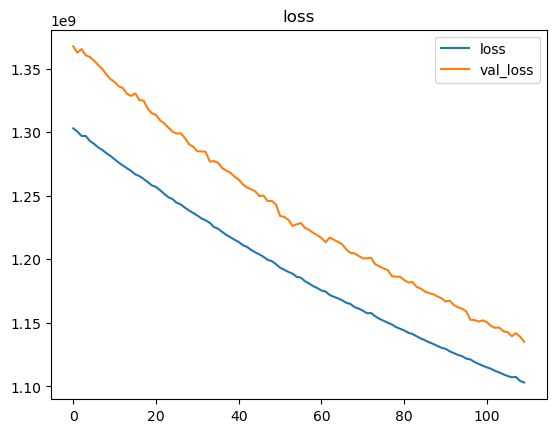

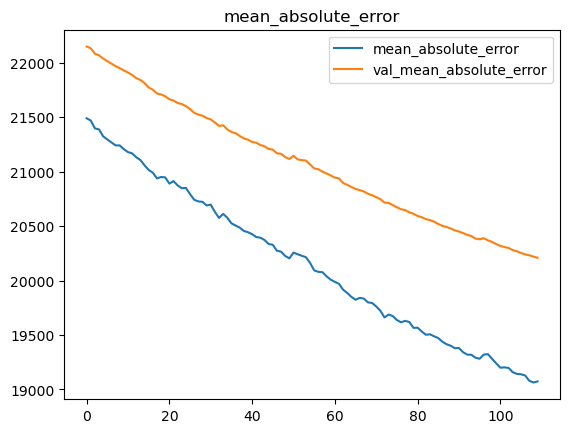

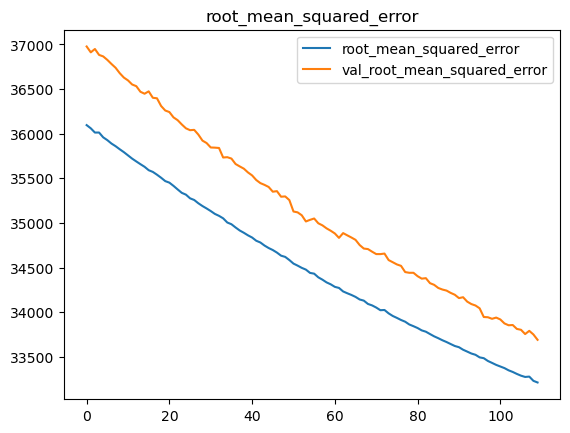

In [30]:
plot_history(history3)

In [31]:
eval_regression(y_test, y_pred, name="reg_model3")

reg_model3 Scores
MAE: 57,662.0923 
MSE: 6,592,636,903.2855 
RMSE: 81,195.0547 
R2: 0.0589

